# CNN sur MNIST
##### MNIST est un ensemble de données classiques
>Objectif est de prédire a partir d'une image manuscrite des chiffres,sa valeur

In [1]:
#Importation des modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#Importation du dataSet de Mnist
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
#Dimension données entrainement
X_train.shape


(60000, 28, 28)

In [4]:
#Dimension données test
X_train.shape


(60000, 28, 28)

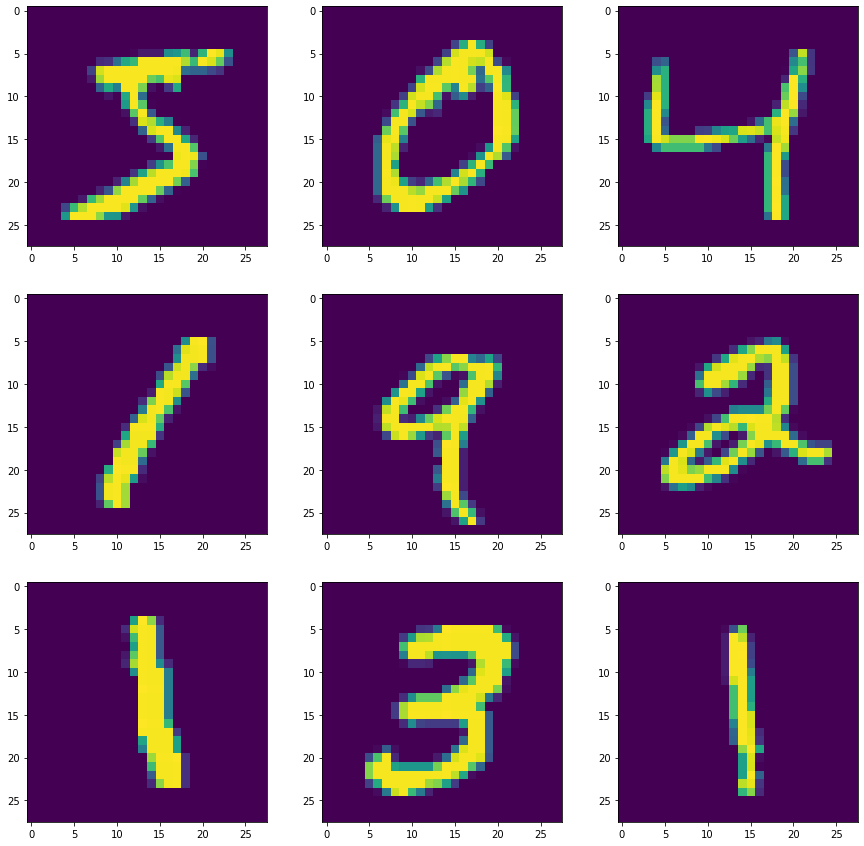

In [5]:
#Visulalisation des données entrainements
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])

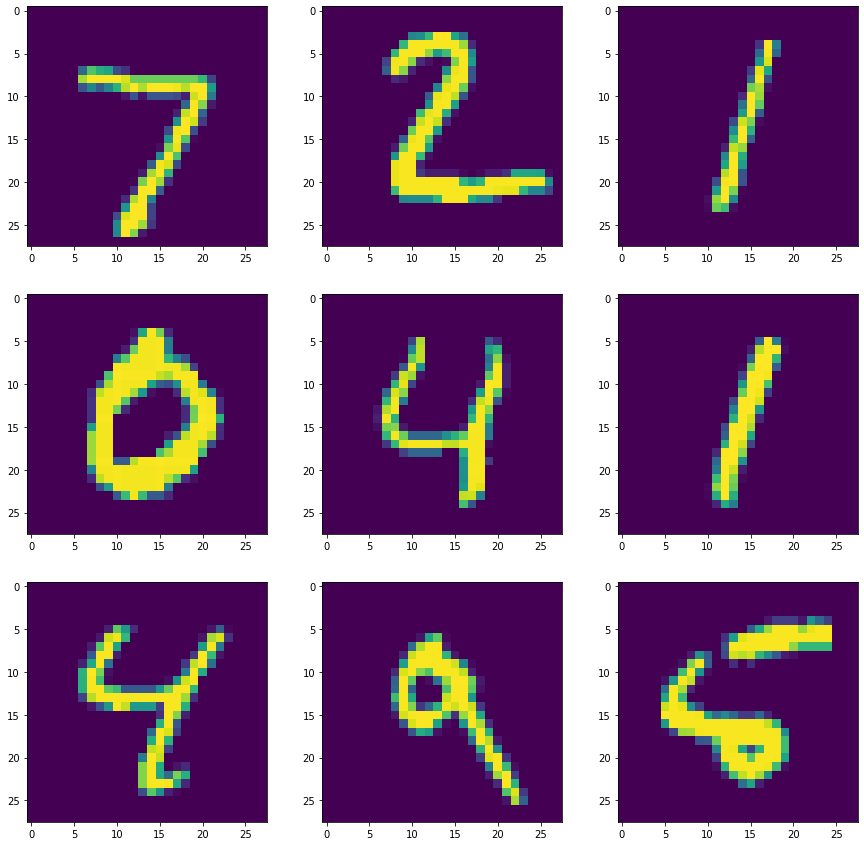

In [6]:
#Visulalisation des données entrainements
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])

#### Remarque
> C'est un probleme de classification.
> On doit transformer les targets y en données catégorielles

In [7]:
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [8]:
#Normalisation des images
X_train=X_train/255
X_test=X_test/255

### Remarque
> MNIST est un enseble d'image noir blanc de taille 28,28.Soit 28,28,1 avec 1 le canal de couleur 

In [9]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

## Création du modele

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [11]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss="binary_crossentropy",optimizer='adam')

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
#Eviter les problemes Overfitting
early=EarlyStopping(monitor="val_loss",patience=2)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [15]:
#Entrainement
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),epochs=1000,callbacks=[early])

Epoch 1/1000
1875/1875 [==============================] - 33s 15ms/step - loss: 0.0359 - val_loss: 0.0133
Epoch 2/1000
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0116 - val_loss: 0.0089
Epoch 3/1000
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 4/1000
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 5/1000
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0043 - val_loss: 0.0076
Epoch 6/1000
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0031 - val_loss: 0.0078


## Evaluation de la performance

<AxesSubplot:>

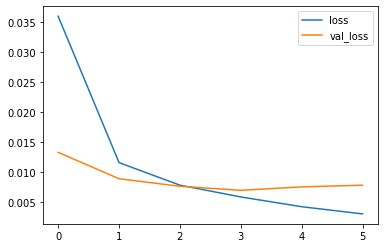

In [21]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [23]:
predictions=np.argmax(model.predict(X_test),axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [28]:
confusion_matrix(y_test,predictions)

array([[ 977,    1,    0,    1,    0,    0,    0,    0,    1,    0],
       [   0, 1132,    1,    1,    0,    0,    1,    0,    0,    0],
       [   1,    2, 1023,    0,    1,    0,    0,    3,    2,    0],
       [   0,    0,    3,  999,    0,    7,    0,    0,    1,    0],
       [   0,    0,    0,    0,  977,    0,    2,    0,    0,    3],
       [   1,    0,    0,    4,    0,  883,    2,    0,    2,    0],
       [   5,    3,    1,    0,    2,    1,  945,    0,    1,    0],
       [   1,    3,   11,    1,    0,    0,    0, 1007,    1,    4],
       [   2,    0,    3,    1,    1,    1,    0,    1,  963,    2],
       [   1,    2,    0,    0,    6,    3,    0,    2,    1,  994]],
      dtype=int64)

<AxesSubplot:>

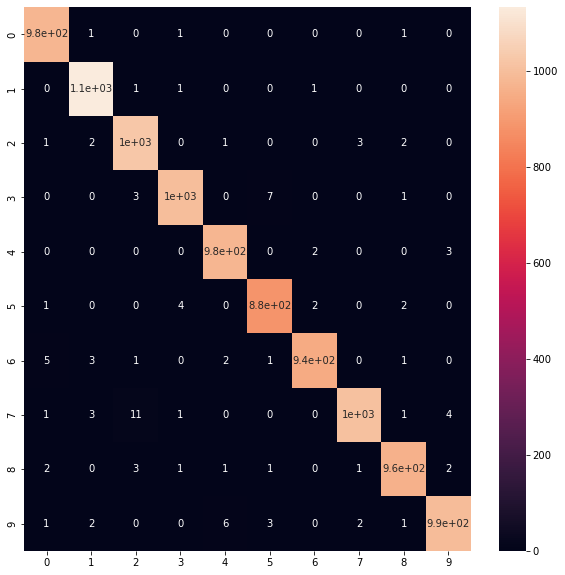

In [31]:
#Visuatlisation de la matrice de confusion
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## Conclusion

> Les performances sont bonnes

## Faire un test

In [59]:
def predire(model,cas):
    plt.imshow(cas.reshape(28,28))
    resultat=np.argmax(model.predict(cas.reshape(1,28,28,1)),axis=1)[0]
    return f"Le nombre sur l'image est {resultat}"

"Le nombre sur l'image est 1"

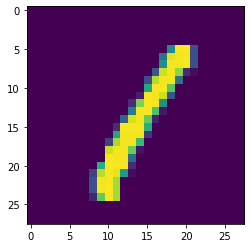

In [61]:
predire(model,X_train[3])

FIN